# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 2 - часть A

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.</font>

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$&mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$.

Реализуйте функции, вычисляющие:
* Асимптотически нормальную оценку $\theta$;
* Оценку асимптотической дисперсии данной оценки.
* Асимптотический доверительный интервал на $\theta$.

In [4]:
def poiss_asymp_norm_est(x):
    est = x.mean()
    return est

In [5]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_norm_est(x), 4, atol=1e-2)

In [6]:
def poiss_asymp_var_est(x):
    est = x.mean()
    return est

In [7]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_var_est(x), 4, atol=1e-2)

In [8]:
def poiss_asymp_confint(x, confidence_level=0.95):
    l = x.mean() - sps.norm(loc=0, scale=1).ppf(1 - (1 - confidence_level) / 2) * np.sqrt(x.mean()) / np.sqrt(len(x))
    r = x.mean() + sps.norm(loc=0, scale=1).ppf(1 - (1 - confidence_level) / 2) * np.sqrt(x.mean()) / np.sqrt(len(x)) 
    return l, r

In [9]:
x = np.array([1, 5, 5, 3, 2, 4, 2, 8, 4, 6])
assert np.allclose(poiss_asymp_confint(x), [2.76, 5.24], atol=1e-2)

Проверим, что при большом размере выборки получившийся интервал действительно имеет уровень доверия $\approx 0.95$:

In [10]:
np.random.seed(0)
dist = sps.poisson(5)
l, r = np.stack([
    poiss_asymp_confint(dist.rvs(size=(500,)))
    for _ in range(10_000)
], axis=1)
estimated_conf_level = np.mean((l <= 5) & (5 <= r))
assert 0.94 <= estimated_conf_level <= 0.96, f"Неправильный уровень доверия {estimated_conf_level:.4f}"

-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из распределения Лапласа с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$. Реализуйте функцию, вычисляющую асимптотический доверительный интервал для параметра $\theta$.

In [11]:
def laplace_asymp_confint(x, confidence_level=0.95):
    l = x.mean() - sps.norm(loc=0, scale=1).ppf((1 + confidence_level) / 2) * np.sqrt(x.mean() / len(x))
    r = x.mean() + sps.norm(loc=0, scale=1).ppf((1 + confidence_level) / 2) * np.sqrt(x.mean() / len(x))
    return l, r

In [12]:
np.random.seed(0)
dist = sps.laplace(loc=2)
l, r = np.stack([
    laplace_asymp_confint(dist.rvs(size=(500,)))
    for _ in range(10_000)
], axis=1)
estimated_conf_level = np.mean((l <= 2) & (2 <= r))
assert 0.94 <= estimated_conf_level <= 0.96, f"Неправильный уровень доверия {estimated_conf_level:.4f}"

---

### Задача 3
В этой задаче нужно визуализировать *свойство асимптотической нормальности*. Посмотрите также на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">этот ноутбук</a>.

*a).* Пусть $X_1, ..., X_n$&mdash; выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\widehat{\theta} = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

<a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">посчитайте</a> оценки  $\widehat{\theta}_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 1$.

In [13]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

In [14]:
np.random.seed(0)
n = 500
num_samples = 300
size = np.linspace(1, 500, 500)
x = sps.uniform().rvs((num_samples, n))  # shape [num_samples, n]
estimation = 2 * x.cumsum(axis=1) / size
z = np.sqrt(size) * (estimation - 1)

In [15]:
assert x.shape == estimation.shape == z.shape == (300, 500)
assert ((0 <= x) & (x <= 1)).all()
assert np.allclose(((1/3 <= x) & (x <= 2/3)).mean(), 1/3, atol=1e-2)
assert np.allclose(estimation[1, 2], 2 * (x[1, 0] + x[1, 1] + x[1, 2]) / 3)
assert np.allclose(z[1, 2], 3**0.5 * estimation[1, 2] - 3**0.5)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ <a href="https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html">с помощью `plt.plot`</a>. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

In [80]:
def plot_trajectories(z):
    for j in range(num_samples):
        plt.xlabel('n')
        plt.ylabel('$Z_{jn}, \  при \  j \ \in \  [1, 300]$')
        plt.plot(size, z[j], 'r', alpha = 0.05)
        plt.xlim((0, n))

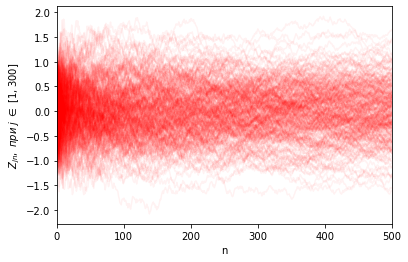

In [81]:
plot_trajectories(z)
lines = plt.gca().lines
assert len(lines) == z.shape[0], "Неверное к-во линий. Не вызывайте plt.show()!"
assert np.allclose(lines[42].get_ydata(), z[42]), "Неверные координаты линий"
assert lines[42].get_alpha() == 0.05, "Неправильная прозрачность линий"
assert len(set(line.get_color() for line in lines)) == 1, "Цвета должны быть одинаковыми"

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_means.html#3.-Когда-придет-мой-автобус?-Или-каково-среднее-время-ожидания-автобуса.">гистограмму и график плотности</a> распределения $\mathcal{N}(0, 
\sigma^2)$, где $\sigma^2$ - дисперсия $U[0, 1]$.  Не забудьте сделать легенду.

In [86]:
def plot_distribution(z):
    grid = np.linspace(-2, 2, 500)
    sigma_square = np.sqrt(1/3)
    plt.hist(z[:, 499], bins=50, density=True, label='Данные')
    plt.plot(grid, sps.norm(loc=0, scale=sigma_square).pdf(grid), label='Плотность $\\mathbb{N}(0, \\sigma^2)$', color='#FF3300')
    plt.legend()

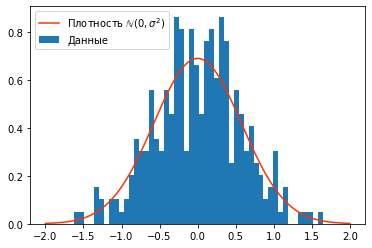

In [87]:
plot_distribution(z)
axes = plt.gca()
total_hist_area = sum(hist_rect.get_width() * hist_rect.get_height()
                      for hist_rect in axes.patches)
assert np.allclose(total_hist_area, 1.0, atol=1e-1), "Гистограмма должна быть нормированна"
assert len(axes.lines) == 1, "Нет графика плотности"
pdf = axes.lines[0]
pdf_fragment = pdf.get_ydata()[np.abs(pdf.get_xdata()) <= 0.3]
assert len(pdf_fragment) > 0, "Некорректный график плотности"
assert ((0.6 <= pdf_fragment) & (pdf_fragment <= 0.7)).all(), "Некорректный график плотности"
assert axes.get_legend() is not None, "Нет легенды"
assert len(axes.get_legend_handles_labels()[1]) == 2, "Не все графики подписаны"

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** 

1)Значения величины $Z_{jn}$ -- не сходятся к константе. 

2)Смысл свойства асимптотической нормальности -- распределение оценки стремится к нормальному с параметрами (0, $\sigma^2$)

3)Оценка является асимптотически нормальной.